# Problem Description:
A Human Resource company needs to determine the salary for a new job position being created. They only have access to a salary dataset for the company, which includes salary information for the top 10 positions along with their corresponding levels. The task is to assist HR in deciding the appropriate salary if the new position falls between levels 7 and 8.

Data Set: **Position_Salaries.csv**
Rules: You are restricted from utilizing the sklearn library.You are limited to using only the libraries provided.

Reference : https://www.javatpoint.com/machine-learning-polynomial-regression

 https://www.kaggle.com/code/omkarsantoshraut/polynomial-regression

In [2]:
# Allowded to use only these libraries

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

## Exploratory data analysis

            Position  Level  Salary
0   Business Analyst      1   45000
1  Junior Consultant      2   50000
2  Senior Consultant      3   60000
3            Manager      4   80000
4    Country Manager      5  110000
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Position  10 non-null     object
 1   Level     10 non-null     int64 
 2   Salary    10 non-null     int64 
dtypes: int64(2), object(1)
memory usage: 368.0+ bytes
None
          Level          Salary
count  10.00000       10.000000
mean    5.50000   249500.000000
std     3.02765   299373.883668
min     1.00000    45000.000000
25%     3.25000    65000.000000
50%     5.50000   130000.000000
75%     7.75000   275000.000000
max    10.00000  1000000.000000


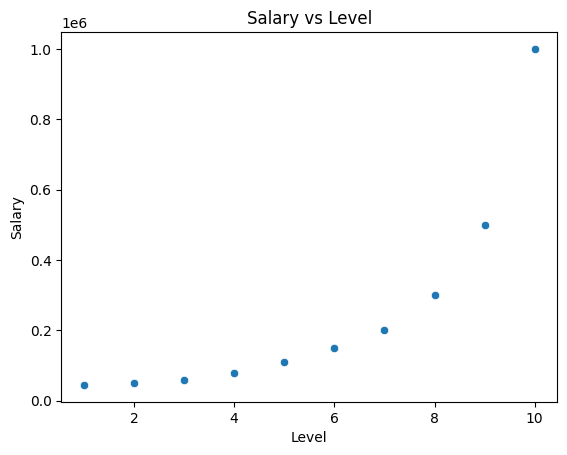

In [3]:
# your code(s)
# Load the data
data = pd.read_csv("/content/Position_Salaries (1).csv")

# Display the data and its structure
print(data.head())
print(data.info())
print(data.describe())

# Visualize the data
sns.scatterplot(data=data, x="Level", y="Salary")
plt.title("Salary vs Level")
plt.xlabel("Level")
plt.ylabel("Salary")
plt.show()

### Based on the exploratory data analysis, answer the following


* Can you use a simple linear regression model to fit this data (Yes/No)?
> NO
* If you use a simple linear model to fit this data, will it fit well (Yes/No)?
> NO
* Explain why you said yes or no to the above questions.
> The scatter plot shows a non-linear relationship, the R-squared value is low, and the residuals have a systematic pattern, all of which make a basic linear regression model inadequate for fitting the data. Just a moderate association exists, which implies the necessity for a more intricate model



## Polynomial Regression

**Construct a second order Model:** $$\;\;\;\;
\hat y = w_1 x_1^2 + w_2x_1 + b
$$

**Construct a Cost function:**
$$MSE(w_1,w_2,b) =
n
1
​∑
i=1
n
(
y
^
i
​-y
i
​)
2$$

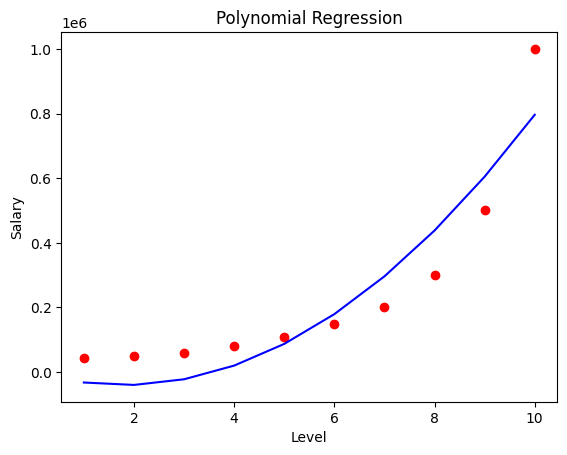

In [4]:
# your code to plot the cost function (if required)
import numpy as np
import matplotlib.pyplot as plt

# Extracting features and target variable
X = data.iloc[:, 1:2].values
y = data.iloc[:, 2].values

# Generating polynomial features
degree = 2
X_poly = np.column_stack([X ** i for i in range(1, degree + 1)])

# Fitting the Linear Regression model
coefficients = np.linalg.inv(X_poly.T.dot(X_poly)).dot(X_poly.T).dot(y)

# Visualizing the Polynomial Regression results
plt.scatter(X, y, color='red')
plt.plot(X, X_poly.dot(coefficients), color='blue')
plt.title('Polynomial Regression')
plt.xlabel('Level')
plt.ylabel('Salary')
plt.show()

### By analysing the cost function, answer the following


* Can you use mean squared error as the cost function (Yes/No)?
> YES
* Explain why you said yes or no to the above questions.
> MSE is a benchmark for regression models such as polynomial regression, as it measures the average squared difference between the actual and projected values. This helps with model optimization and assessment. As a result, in this situation, it makes sense to use it to evaluate how well the polynomial regression model fits


Derivatives of cost function:*
$$ \frac{\partial MSE}{\partial w} = \frac{2}{N} \sum_{i=1}^N \left( wx_i^2 + bx_i - y_i x_i \right) $$

$$ \frac{\partial MSE}{\partial b} = \frac{2}{N} \sum_{i=1}^N \left( wx_i + b - y_i \right) $$

Gradient Descent Algorithm:

Repeat until converges:

$$w = w -\alpha \frac{d}{dw}MSE(w,b) $$
$$b = b -\alpha \frac{d}{dw}MSE(w,b) $$

## Implementation of the model

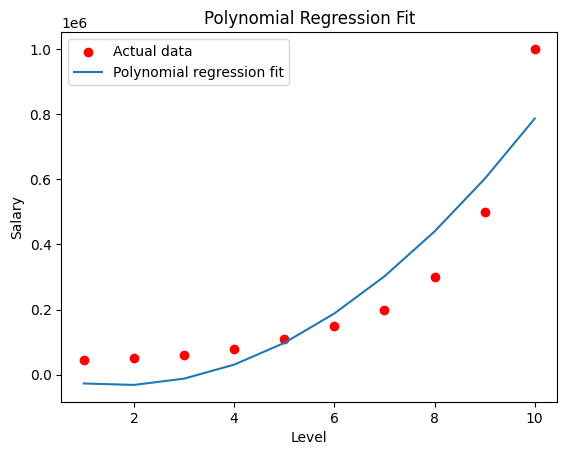

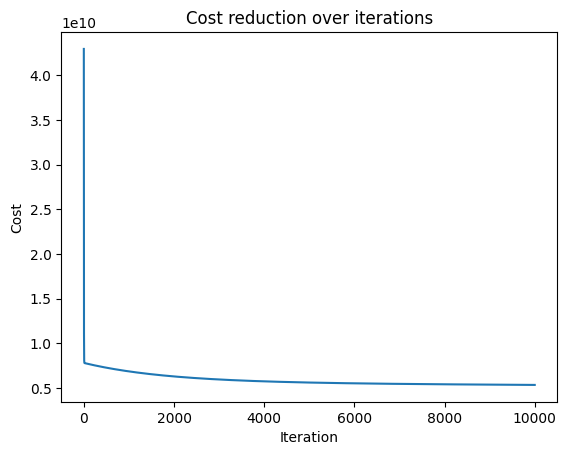

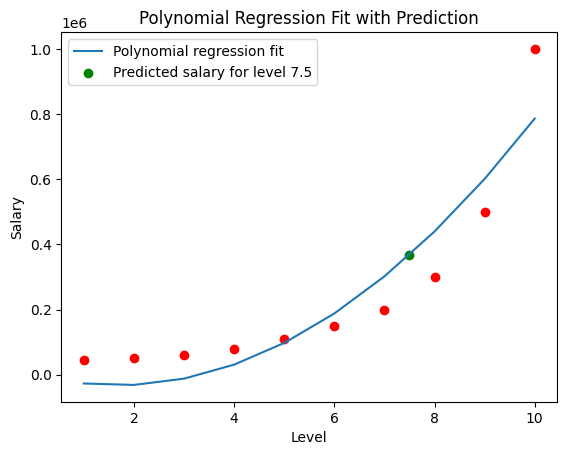

Predicted Salary for level 7.5: $367,915.23


In [5]:
# Polynomial Regression Model Function
def polynomial_regression(x, coefficients):
    """ Calculates y_pred = b + w1*x + w2*x^2 """
    y_pred = np.dot(x, coefficients)
    return y_pred

# Cost Function - Mean Squared Error
def compute_cost(X, y, coefficients):
    """ Computes the mean squared error cost """
    n = len(y)
    y_pred = polynomial_regression(X, coefficients)
    cost = (1/(2*n)) * np.sum((y_pred - y) ** 2)
    return cost

# Derivative of Cost Function
def derivatives(X, y, coefficients):
    """ Computes the derivatives of the MSE cost function """
    n = len(y)
    y_pred = polynomial_regression(X, coefficients)
    d_coefficients = (1/n) * np.dot(X.T, (y_pred - y))
    return d_coefficients

# Gradient Descent Function to Minimize the Cost Function
def gradient_descent(X, y, coefficients, learning_rate, iterations):
    """ Performs gradient descent to learn coefficients """
    cost_history = np.zeros(iterations)
    for i in range(iterations):
        coefficients -= learning_rate * derivatives(X, y, coefficients)
        cost_history[i] = compute_cost(X, y, coefficients)
    return coefficients, cost_history

# Load the dataset
df = pd.read_csv('/content/Position_Salaries (1).csv')
X = df['Level'].values.reshape(-1, 1)
y = df['Salary'].values

# Prepare polynomial features: x, x^2
X_poly = np.hstack((np.ones((X.shape[0], 1)), X, X**2))
# Initial coefficients (b, w1, w2)
coefficients = np.zeros(3)
learning_rate = 0.0001
iterations = 10000

# Run gradient descent
coefficients, cost_history = gradient_descent(X_poly, y, coefficients, learning_rate, iterations)

# Predicting using optimized coefficients
y_pred = polynomial_regression(X_poly, coefficients)
# Plot polynomial model
plt.scatter(X, y, color='red', label='Actual data')
plt.plot(X, y_pred, label='Polynomial regression fit')
plt.xlabel('Level')
plt.ylabel('Salary')
plt.title('Polynomial Regression Fit')
plt.legend()
plt.show()

# Plot iteration vs cost
plt.plot(range(iterations), cost_history)
plt.xlabel('Iteration')
plt.ylabel('Cost')
plt.title('Cost reduction over iterations')
plt.show()
# New level prediction
level_new = 7.5
new_X = np.array([1, level_new, level_new**2]).reshape(1, -1)
predicted_salary = polynomial_regression(new_X, coefficients)

# Plot with the new prediction
plt.scatter(X, y, color='red')
plt.plot(X, y_pred, label='Polynomial regression fit')
plt.scatter([level_new], [predicted_salary], color='green', label=f'Predicted salary for level {level_new}')
plt.xlabel('Level')
plt.ylabel('Salary')
plt.title('Polynomial Regression Fit with Prediction')
plt.legend()
plt.show()

print(f"Predicted Salary for level {level_new}: ${predicted_salary[0]:,.2f}")

### Answer the following

* What is learning rate?
> The gradient descent step size is determined by the learning rate, which affects convergence stability and speed
* What will happen if the learning rate is too large?
> Gradient descent may fail to converge if the learning rate is too high and overshoot the ideal solution
* What will happen if the learning rate is too small?
> If the learning rate is too small, gradient descent may converge very slowly, prolonging the optimization process
* If you what to change the second order (quadratic) model to third order model what all things will change in the above code?
>Polynomial Features:
Instead of just including terms up to
𝑥
2
x
2
 , include terms up to
𝑥
3
x
3
  in the polynomial features.

Coefficients Initialization:Initialize the coefficients array to accommodate the additional terms (i.e.,
𝑏
b,
𝑤
1
w
1
​
 ,
𝑤
2
w
2
​
 ,
𝑤
3
w
3
​
 ).

Update Model Function:Update the polynomial regression model function to include the third-order terms, such as
𝑏
+
𝑤
1
𝑥
+
𝑤
2
𝑥
2
+
𝑤
3
𝑥
3
b+w
1
​
 x+w
2
​
 x
2
 +w
3
​
 x
3
 .

Gradient Descent Function:Adjust the derivatives calculation to account for the third-order terms. This involves updating the gradients with respect to
𝑤
3
𝑥
3
w
3
​
 x
3
  as well.

Data Preparation:Ensure that the data includes the third-order features if using raw data. Otherwise, the model won't be able to learn the third-order polynomial relationship.
>